# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

4. ***Link Dataset***
   https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd         # Untuk manipulasi data
import numpy as np          # Untuk perhitungan numerik
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns       # Untuk visualisasi yang lebih interaktif

# Library Preprocessing untuk Clustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


# Library untuk Model Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [219]:
data_path = './Dataset_Inisiasi.csv'
df = pd.read_csv(data_path)

print(df.head())

  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66        53      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56        90      0.10       126.36  Baden-Württemberg  2023-08-23  
2        1.17        73      0.05        81.14  Baden-Württemberg  2023-08-23  
3        3.22        59      0.10       170.98  Baden-Württemberg  2023-08-23  
4        0.87        35      0.10        27.40  Baden-Württemberg  2023-08-23  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [220]:
# Menampilkan dimensi dataset (jumlah baris dan kolom)
print("\nDimensi Dataset:")
print("Jumlah Baris dan Kolom:", df.shape)


Dimensi Dataset:
Jumlah Baris dan Kolom: (8999910, 11)


In [221]:
# Menampilkan informasi tentang tipe data tiap kolom
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [222]:
# Ambil Sample Dataset dataset secara acak karena dataset terlalu besar
df = df.sample(n=100000, random_state=69, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       100000 non-null  object 
 1   Customer_ID    100000 non-null  object 
 2   Customer_Type  100000 non-null  object 
 3   Product        100000 non-null  object 
 4   Category       100000 non-null  object 
 5   Unit_Price     100000 non-null  float64
 6   Quantity       100000 non-null  int64  
 7   Discount       100000 non-null  float64
 8   Total_Price    100000 non-null  float64
 9   Region         100000 non-null  object 
 10  Order_Date     100000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.4+ MB


In [223]:
# Analisis Variabel Nuemerik
num_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
print(f"\n Numerical Variables Analysis: {num_cols}")


 Numerical Variables Analysis: ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']


In [224]:
# Statistik Deskriptif
print(df[num_cols].describe().T)

                count        mean         std   min   25%    50%      75%  \
Unit_Price   100000.0    5.773509   14.552819  0.32  1.05   1.75   3.2100   
Quantity     100000.0   23.236670   26.929755  1.00  6.00  11.00  31.0000   
Discount     100000.0    0.030060    0.044981  0.00  0.00   0.00   0.0500   
Total_Price  100000.0  132.579773  524.241820  0.32  8.40  21.14  70.2125   

                  max  
Unit_Price     159.80  
Quantity       100.00  
Discount         0.15  
Total_Price  12817.75  


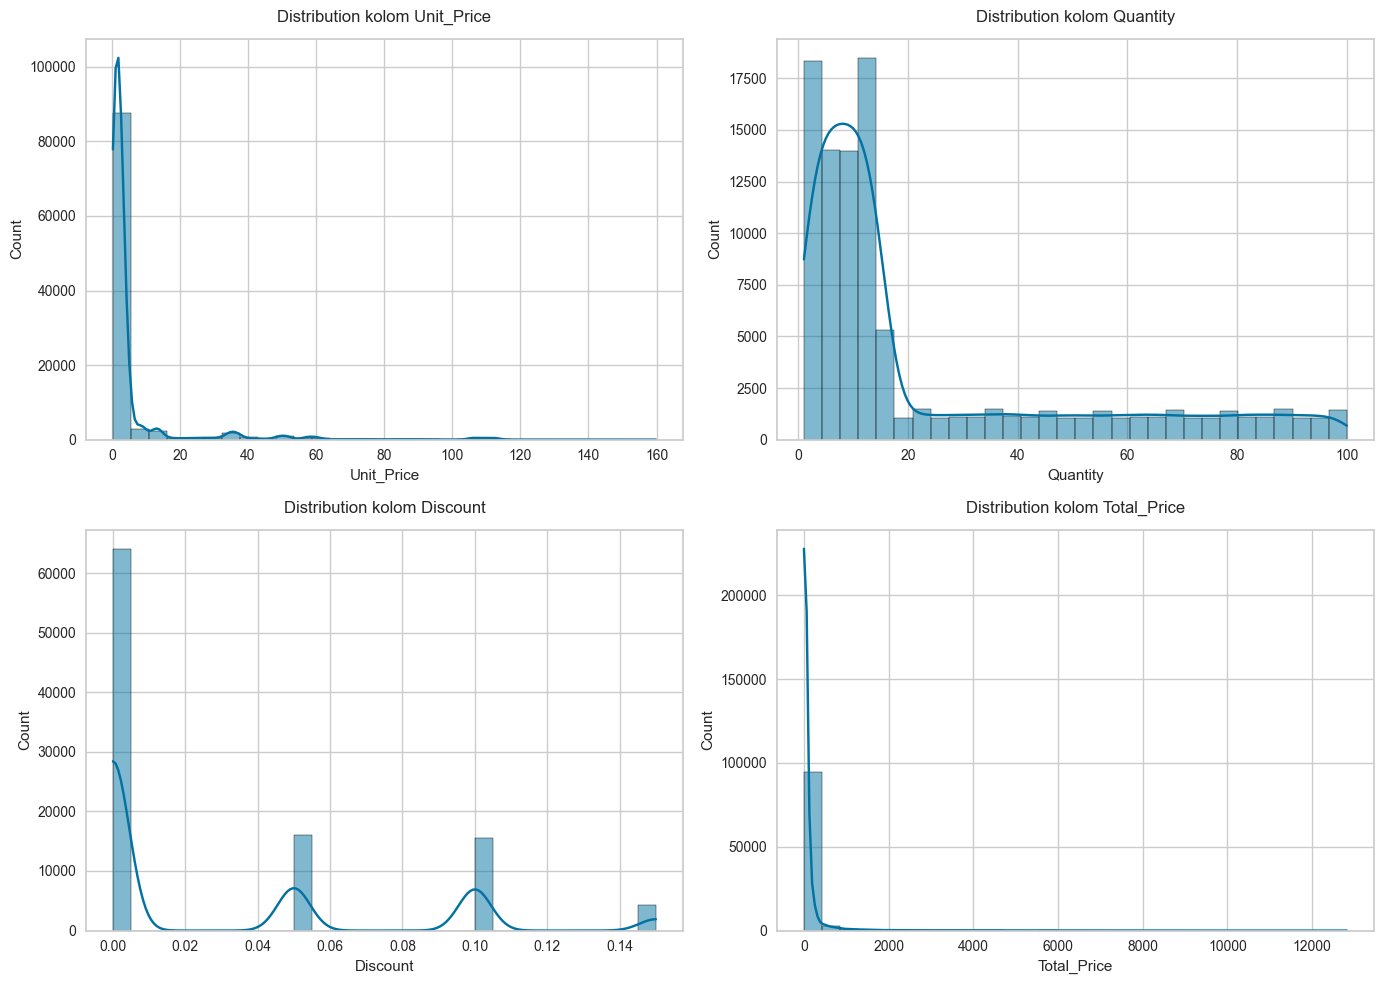

In [225]:
# Distribusi dengan Histogram & Boxplot
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution kolom {col}', pad=12)
    
plt.tight_layout()
plt.show()

In [226]:
# Analisis Variabel Kategorikal
cat_cols = ['Customer_Type', 'Region', 'Category']
print(f"Categorical Variables Analysis: {cat_cols}")

Categorical Variables Analysis: ['Customer_Type', 'Region', 'Category']


C:\Users\asus\AppData\Local\Temp\ipykernel_5192\2101141531.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order, palette='Set2')
C:\Users\asus\AppData\Local\Temp\ipykernel_5192\2101141531.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order, palette='Set2')
C:\Users\asus\AppData\Local\Temp\ipykernel_5192\2101141531.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order, palette='Set2')


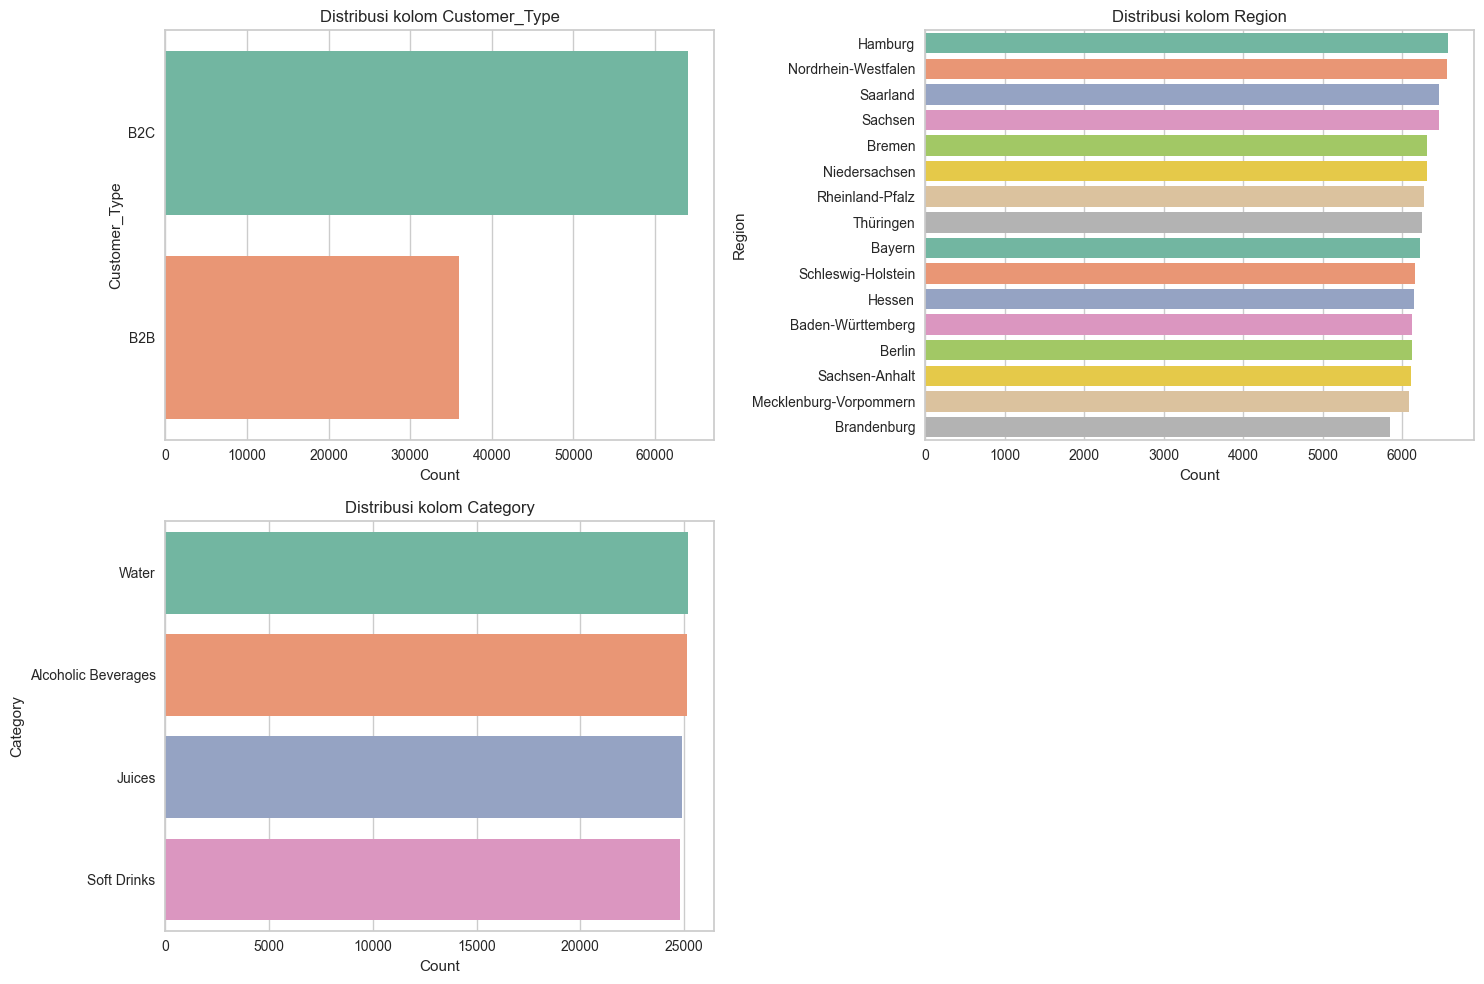

In [227]:
# Visualisasi Distribusi Kategorikal
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    order = df[col].value_counts().index
    sns.countplot(data=df, y=col, order=order, palette='Set2')
    plt.title(f'Distribusi kolom {col}')
    plt.xlabel('Count')
    
plt.tight_layout()
plt.show()

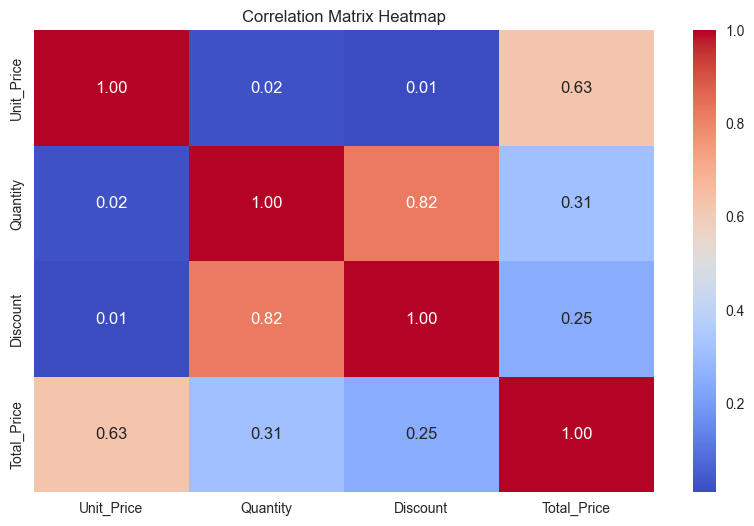

In [228]:
# Analisis Korelasi
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

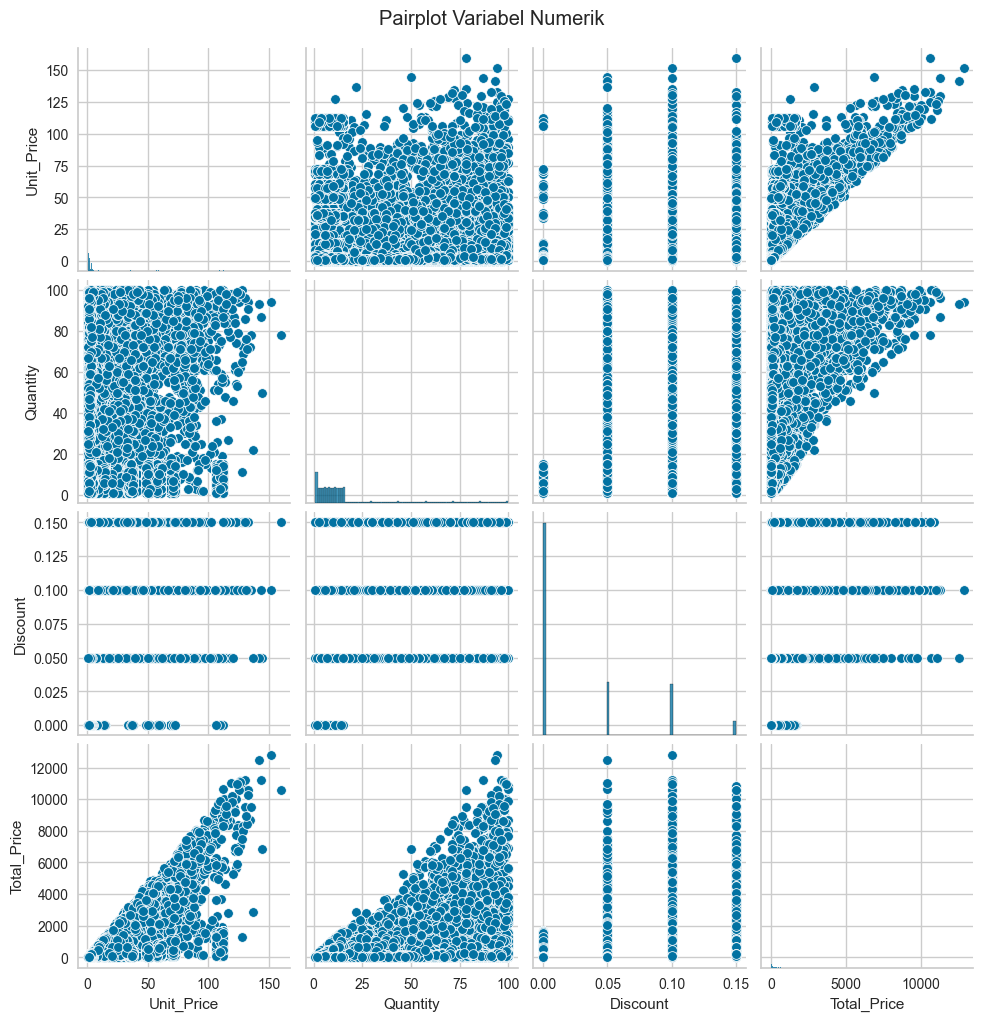

In [229]:
# Pairplot untuk melihat hubungan antar variabel numerik
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot Variabel Numerik", y=1.02)
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_5192\1074051457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Region'].value_counts().values,


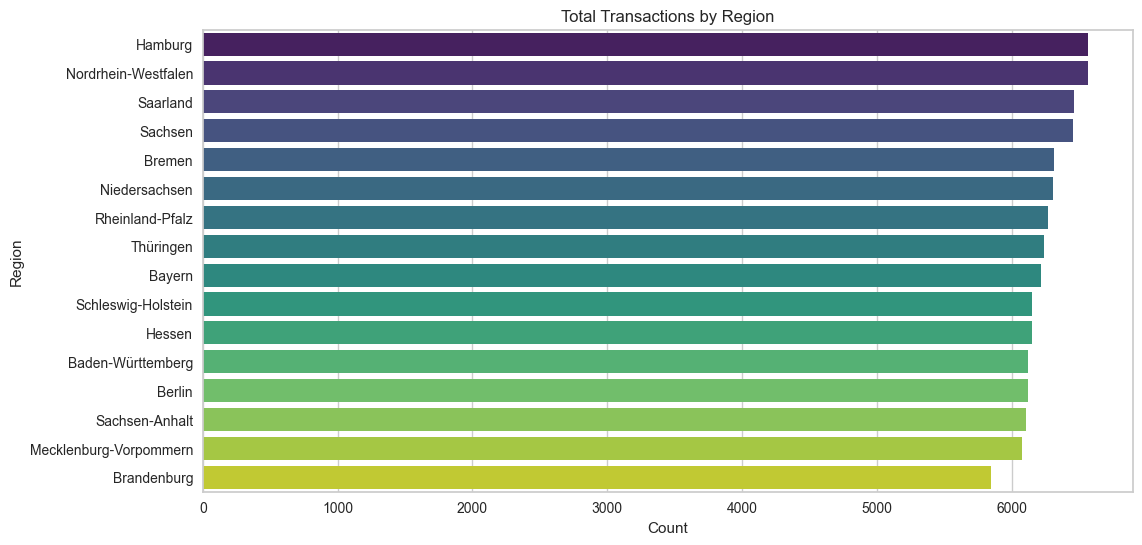

In [230]:
# Penjualan per Region
plt.figure(figsize=(12,6))
region_order = df['Region'].value_counts().index
sns.barplot(x=df['Region'].value_counts().values, 
            y=region_order, 
            palette='viridis')
plt.title('Total Transactions by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

In [231]:
# Konversi ke datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')  # 'coerce' untuk handle format invalid

# Cek apakah ada nilai invalid
print("Jumlah tanggal invalid:", df['Order_Date'].isna().sum())

Jumlah tanggal invalid: 0


In [232]:
# Analisis B2B vs B2C
print("\nB2B vs B2C Analysis")


B2B vs B2C Analysis


C:\Users\asus\AppData\Local\Temp\ipykernel_5192\3760201438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Customer_Type', y='Total_Price',


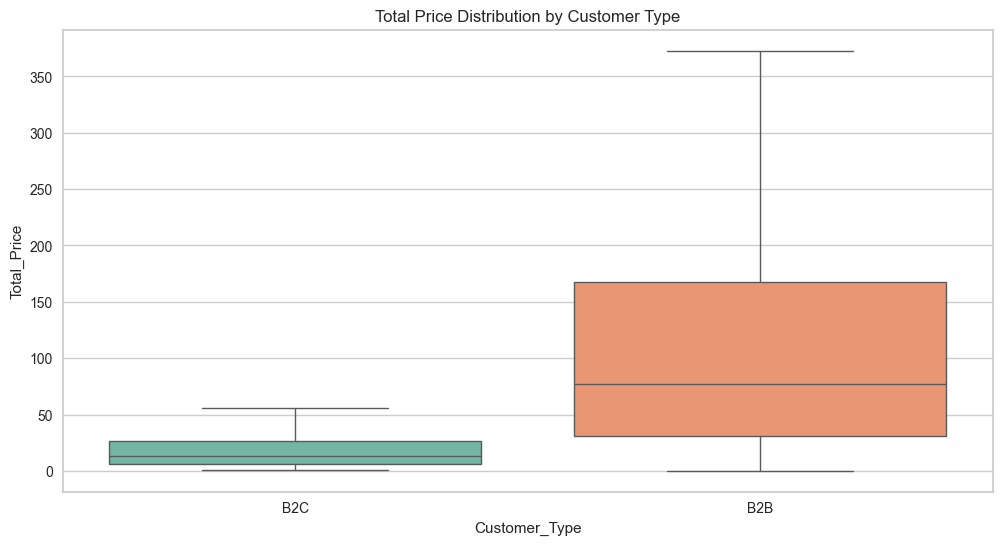

In [233]:
# Perbandingan Pembelian
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Customer_Type', y='Total_Price', 
            palette='Set2', showfliers=False)
plt.title('Total Price Distribution by Customer Type')
plt.show()

In [234]:
# Discount Analysis (Hanya B2B seharusnya ada discount)
discount_check = df.groupby('Customer_Type')['Discount'].mean()
print("\n💡 Average Discount by Customer Type:")
print(discount_check)


💡 Average Discount by Customer Type:
Customer_Type
B2B    0.083644
B2C    0.000000
Name: Discount, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_5192\1083417192.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='rocket')


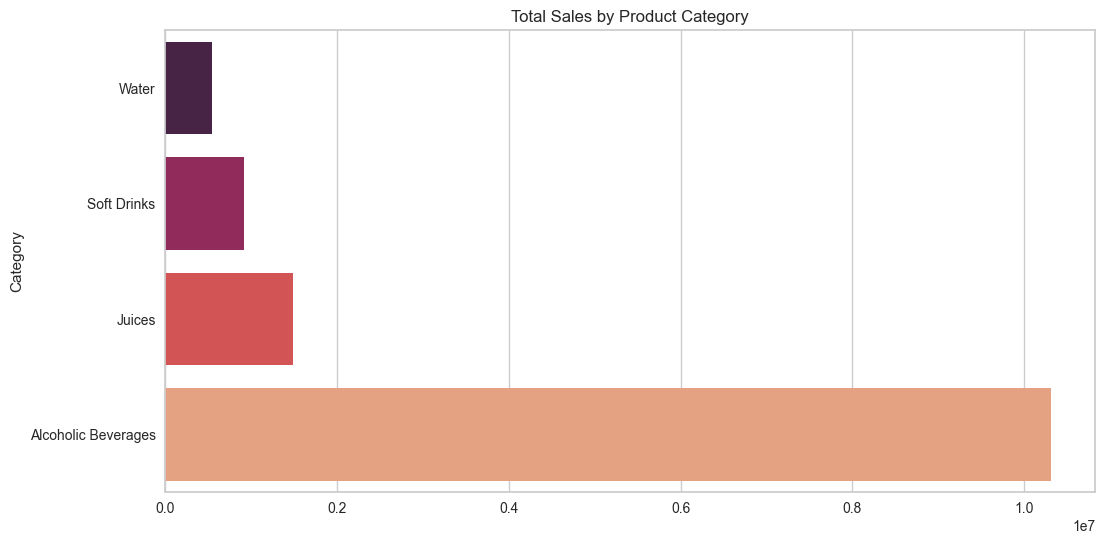

In [235]:
# Analisis Kategori Produk
plt.figure(figsize=(12,6))
category_sales = df.groupby('Category')['Total_Price'].sum().sort_values()
sns.barplot(x=category_sales.values, y=category_sales.index, palette='rocket')
plt.title('Total Sales by Product Category')
plt.show()

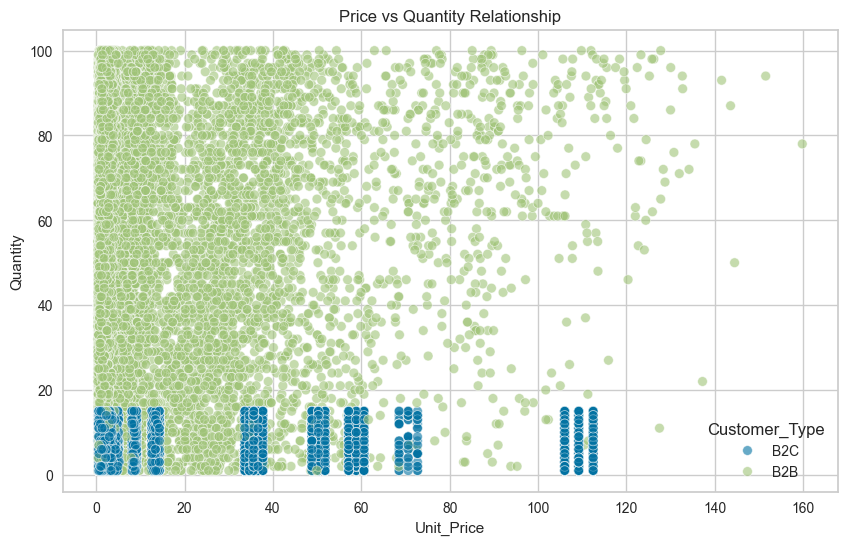

In [236]:
# Analisis Price vs Quantity
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Unit_Price', y='Quantity', 
                hue='Customer_Type', alpha=0.6)
plt.title('Price vs Quantity Relationship')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_5192\858269499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Unit_Price', palette='Set3')


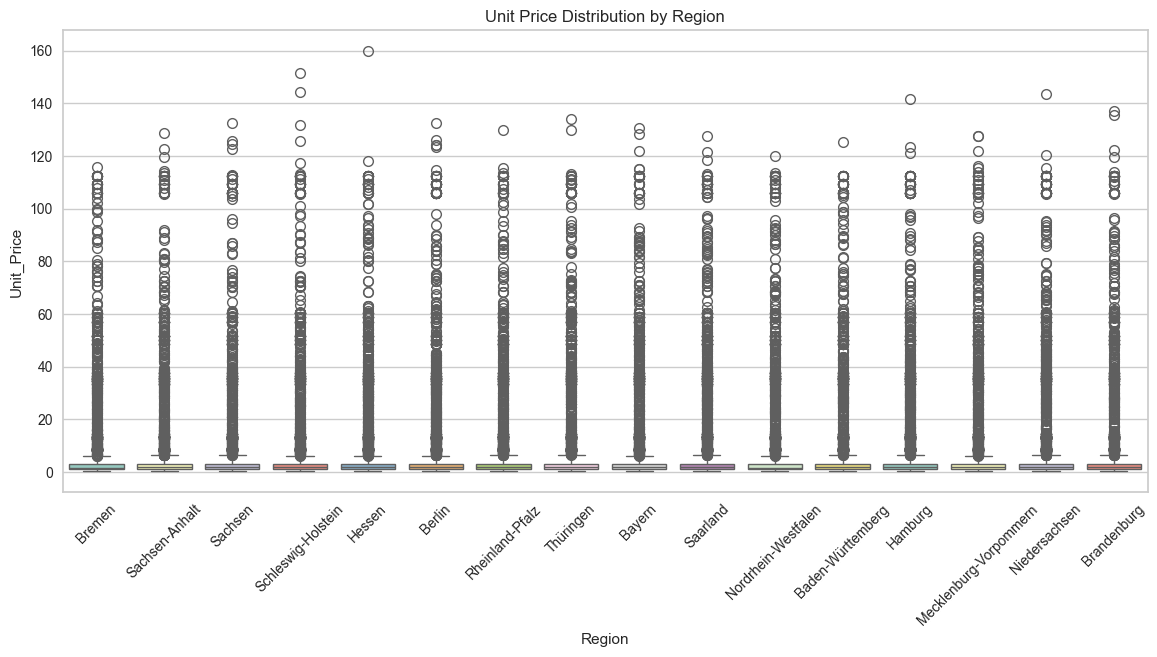

In [237]:
# Distribusi harga berdasarkan Region
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Region', y='Unit_Price', palette='Set3')
plt.title('Unit Price Distribution by Region')
plt.xticks(rotation=45)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [238]:
# Handling Data Duplikat
print("Jumlah duplikat awal:", df.duplicated().sum())

Jumlah duplikat awal: 0


In [239]:
# Handling Missing Value
# Aturan bisnis: Discount hanya untuk B2B
df['Discount'] = np.where(
    df['Customer_Type'] == 'B2C',
    0.0,  # Force 0 untuk B2C
    df['Discount'].fillna(0.0)  # Isi NA B2B dengan 0
)

In [240]:
# Inisialisasi scaler
normalizer = MinMaxScaler() 
standardizer = StandardScaler()

In [241]:
# Normalisasi kolom kuantitas
df_norm = df.copy()
df_norm['Quantity'] = normalizer.fit_transform(df_norm[['Quantity']])
df_norm.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,0.060606,0.00,7.28,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,0.454545,0.10,29.39,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,2.90,0.727273,0.05,201.11,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,0.292929,0.05,76.38,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,0.020202,0.00,2.73,Hessen,2023-04-28


In [242]:
# Standarisasi kolom harga
price_cols = ['Unit_Price', 'Total_Price']
df_std = df_norm.copy()
df_std[price_cols] = standardizer.fit_transform(df_std[price_cols])
df_std.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.325266,0.060606,0.00,-0.239013,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.347942,0.454545,0.10,-0.196837,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,-0.197455,0.727273,0.05,0.130723,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.212572,0.292929,0.05,-0.107203,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.334199,0.020202,0.00,-0.247692,Hessen,2023-04-28


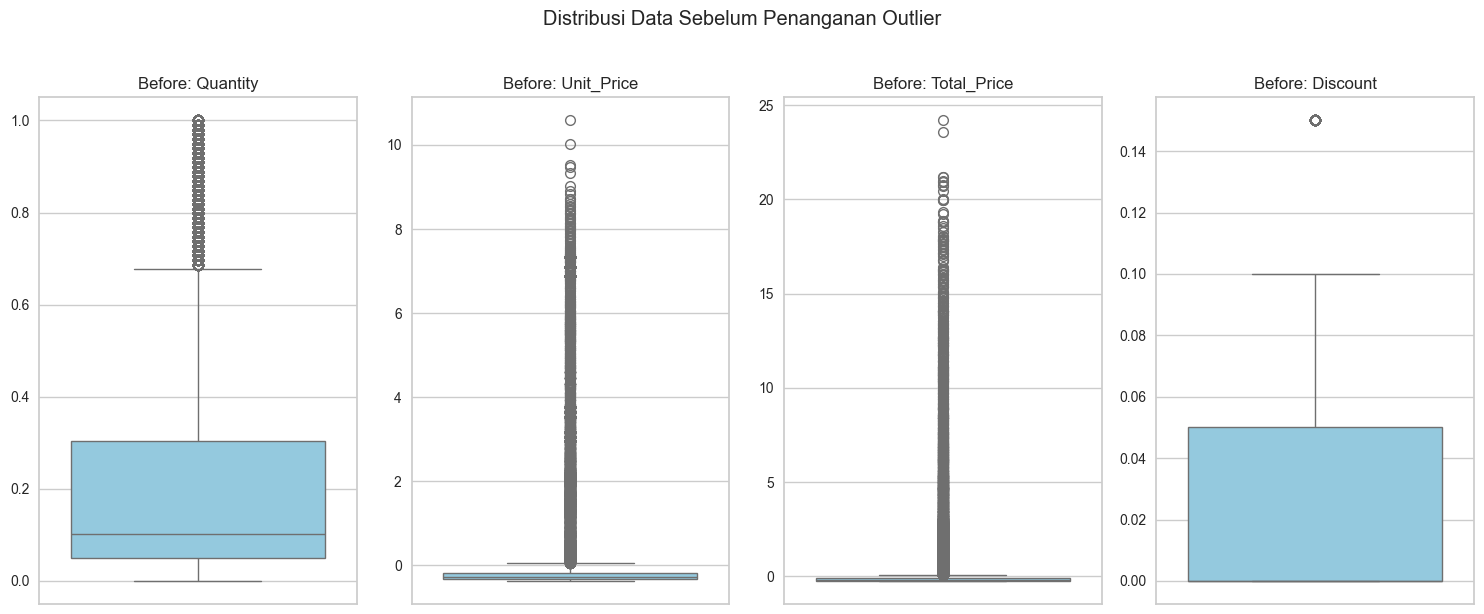

In [243]:
numerical_features = ['Quantity', 'Unit_Price', 'Total_Price', 'Discount']

plt.figure(figsize=(15, 6))
plt.suptitle("Distribusi Data Sebelum Penanganan Outlier", y=1.02)

for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df_std[col], color='skyblue')
    plt.title(f'Before: {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [245]:
# PENANGANAN OUTLIER (IQR WINSORIZING)
mask = np.ones(len(df_std), dtype=bool)

for col in numerical_features:
    q1 = df_std[col].quantile(0.25)
    q3 = df_std[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # Perbarui mask untuk tiap kolom
    mask &= (df_std[col] >= lower) & (df_std[col] <= upper)

# Terapkan mask untuk mendapatkan DataFrame yang sudah bersih dari outlier
df_clean = df_std[mask]

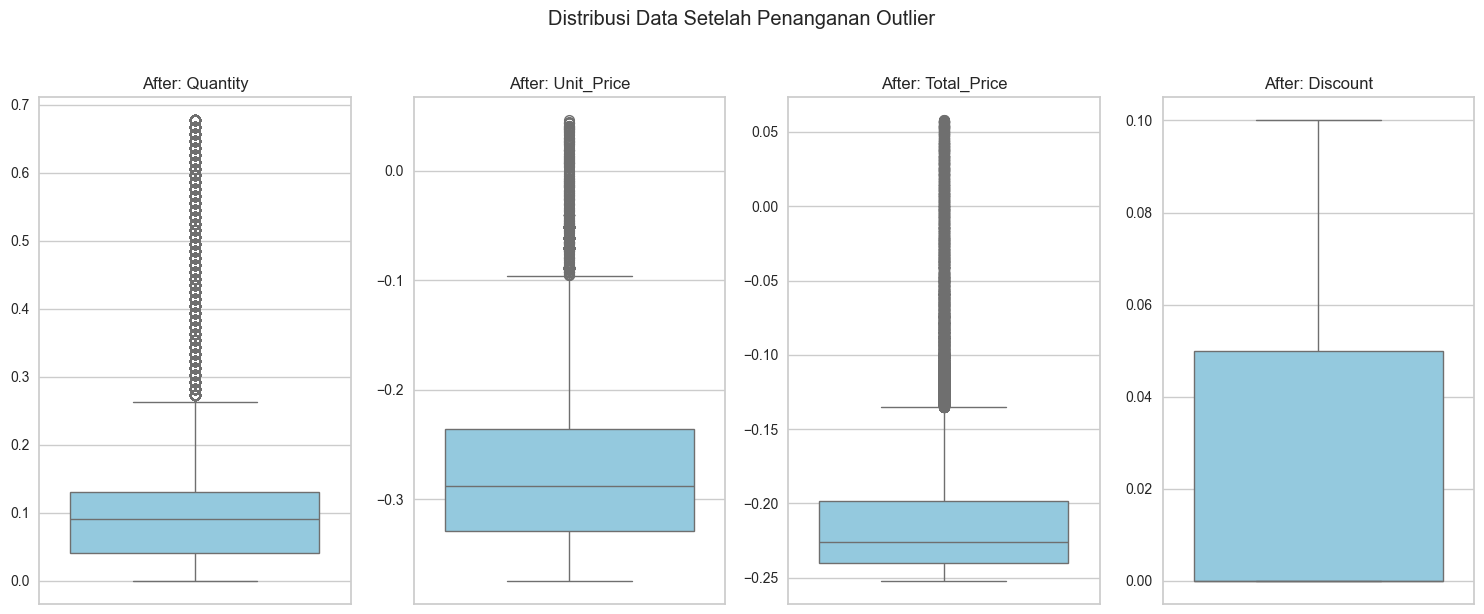

In [246]:
# Setelah Penanganan Outlier
plt.figure(figsize=(15, 6))
plt.suptitle("Distribusi Data Setelah Penanganan Outlier", y=1.02)

for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df_clean[col], color='skyblue')
    plt.title(f'After: {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [247]:
print("🔼 Jumlah Data Sebelum vs Sesudah:")
print(f"Sebelum: {len(df_std)} baris")
print(f"Sesudah: {len(df_clean)} baris")

print("\n📊 Statistik Sebelum:")
display(df_std[numerical_features].describe().round(2))

print("\n📊 Statistik Sesudah:")
display(df_clean[numerical_features].describe().round(2))

🔼 Jumlah Data Sebelum vs Sesudah:
Sebelum: 100000 baris
Sesudah: 75948 baris

📊 Statistik Sebelum:


,Quantity,Unit_Price,Total_Price,Discount
count,100000.00,100000.00,100000.00,100000.00
mean,0.22,-0.00,0.00,0.03
std,0.27,1.00,1.00,0.04
min,0.00,-0.37,-0.25,0.00
25%,0.05,-0.32,-0.24,0.00
50%,0.10,-0.28,-0.21,0.00
75%,0.30,-0.18,-0.12,0.05
max,1.00,10.58,24.20,0.15



📊 Statistik Sesudah:


,Quantity,Unit_Price,Total_Price,Discount
count,75948.00,75948.00,75948.00,75948.00
mean,0.13,-0.27,-0.21,0.02
std,0.15,0.07,0.05,0.03
min,0.00,-0.37,-0.25,0.00
25%,0.04,-0.33,-0.24,0.00
50%,0.09,-0.29,-0.23,0.00
75%,0.13,-0.24,-0.20,0.05
max,0.68,0.05,0.06,0.10


In [248]:
# Encoding hierarkis
encoder = LabelEncoder()
df_encoded = df_clean.copy()

In [249]:
# Label encoding untuk kategori produk dan region
categorical_cols = ['Category', 'Region', 'Product']
df_encoded[categorical_cols] = df_encoded[categorical_cols].apply(
    lambda x: encoder.fit_transform(x)
)

In [250]:
# One-hot encoding untuk tipe pelanggan
ohe = OneHotEncoder(sparse_output=False)
customer_type_encoded = ohe.fit_transform(df_encoded[['Customer_Type']])
df_encoded[ohe.get_feature_names_out()] = customer_type_encoded

In [251]:
# Cek Data yang sudah melalui tahap Preprocessing
df_encoded.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
0,ORD697566,CUS6363,B2C,5,2,-0.325266,0.060606,0.00,-0.239013,4,2021-02-17,0.0,1.0
1,ORD1118443,CUS7797,B2B,32,3,-0.347942,0.454545,0.10,-0.196837,13,2023-04-15,1.0,0.0
3,ORD1437128,CUS6393,B2B,20,2,-0.212572,0.292929,0.05,-0.107203,14,2021-09-07,1.0,0.0
4,ORD562794,CUS4090,B2C,29,3,-0.334199,0.020202,0.00,-0.247692,6,2023-04-28,0.0,1.0
5,ORD2320519,CUS5936,B2C,2,0,-0.299841,0.030303,0.00,-0.242141,4,2023-11-01,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [279]:
# Definisikan fitur yang akan digunakan
features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Customer_Type_B2C']
X = df_encoded[features]
X

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2C
0,-0.325266,0.060606,0.00,-0.239013,1.0
1,-0.347942,0.454545,0.10,-0.196837,0.0
3,-0.212572,0.292929,0.05,-0.107203,0.0
4,-0.334199,0.020202,0.00,-0.247692,1.0
5,-0.299841,0.030303,0.00,-0.242141,1.0
...,...,...,...,...,...
99992,-0.241433,0.131313,0.00,-0.192545,1.0
99993,-0.287472,0.050505,0.00,-0.234702,1.0
99995,-0.317020,0.050505,0.00,-0.239623,1.0
99997,-0.353439,0.000000,0.00,-0.251698,1.0


In [280]:
# Reduksi dimensi data menjadi 2 komponen utama untuk keperluan visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [281]:
# Melatih model KMeans dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=4, random_state=69, init='k-means++')
kmeans.fit(X_pca)

KMeans(n_clusters=4, random_state=69)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Optimal k berdasarkan Yellowbrick Elbow Method: 4


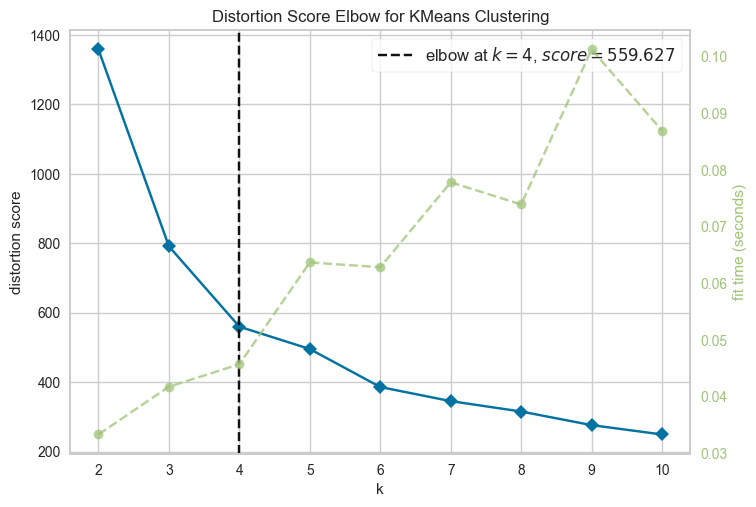

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [282]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans_init = KMeans(random_state=69, init='k-means++')
visualizer = KElbowVisualizer(kmeans_init, k=(2, 11))
visualizer.fit(X)  # X: data asli dengan fitur yang telah dipilih
optimal_k = visualizer.elbow_value_
print("Optimal k berdasarkan Yellowbrick Elbow Method:", optimal_k)
visualizer.show()  # Visualisasi akan muncul di notebook

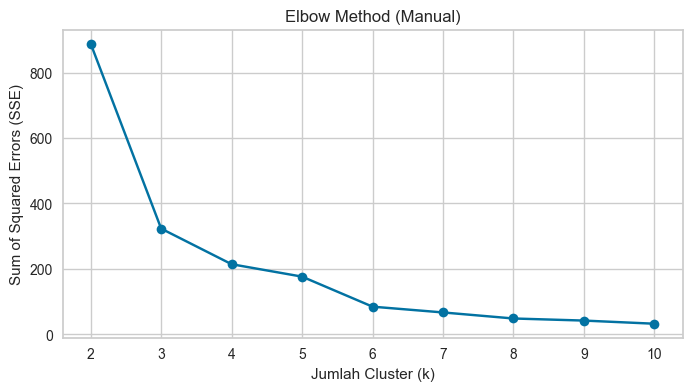

In [283]:
# --- Evaluasi dengan Elbow Method secara Manual ---
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=69, init='k-means++')
    kmeans_temp.fit(X_pca)  # Menggunakan X_pca agar perhitungan lebih cepat karena dimensi berkurang
    sse.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method (Manual)')
plt.show()

In [284]:
# Evaluasi model clustering menggunakan Silhouette Score
sil_score = silhouette_score(X_pca, kmeans.labels_)
print(f'Silhouette Score untuk K={optimal_k}: {sil_score}')

Silhouette Score untuk K=4: 0.8536700527764106


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [285]:
#Lakukan analisis korelasi antar fitur untuk melihat apakah ada fitur yang sangat berkorelasi
print("\nAnalisis Korelasi antar fitur:")
corr_matrix = X.corr().abs()
print(corr_matrix)


Analisis Korelasi antar fitur:
                   Unit_Price  Quantity  Discount  Total_Price  \
Unit_Price           1.000000  0.088604  0.097305     0.392851   
Quantity             0.088604  1.000000  0.750061     0.769787   
Discount             0.097305  0.750061  1.000000     0.555971   
Total_Price          0.392851  0.769787  0.555971     1.000000   
Customer_Type_B2C    0.107354  0.722337  0.925617     0.535939   

                   Customer_Type_B2C  
Unit_Price                  0.107354  
Quantity                    0.722337  
Discount                    0.925617  
Total_Price                 0.535939  
Customer_Type_B2C           1.000000  


In [286]:
# Menggunakan threshold untuk menentukan fitur yang berkorelasi tinggi (misalnya threshold 0.8)
threshold = 0.8
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > threshold)]
print("\nFitur yang sangat berkorelasi dan dapat di-drop:", to_drop)


Fitur yang sangat berkorelasi dan dapat di-drop: ['Customer_Type_B2C']


In [287]:
# Fitur terpilih setelah feature selection
selected_features = [feat for feat in features if feat not in to_drop]
print("Fitur terpilih setelah feature selection:", selected_features)

Fitur terpilih setelah feature selection: ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']



Re-running clustering dengan fitur terpilih...
Optimal k untuk fitur terpilih: 4


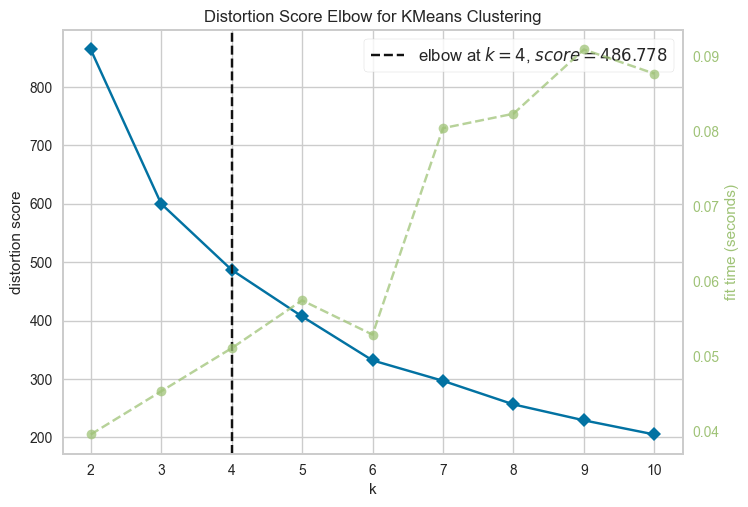

In [288]:
# Jika terdapat perubahan fitur (misal, ada fitur yang di-drop), ulangi proses clustering
if selected_features != features:
    print("\nRe-running clustering dengan fitur terpilih...")
    X_selected = df_encoded[selected_features]
    
    # Menentukan jumlah cluster optimal dengan fitur terpilih
    kmeans_selected = KMeans()
    visualizer_selected = KElbowVisualizer(kmeans_selected, k=(2, 11))
    visualizer_selected.fit(X_selected)
    optimal_k_selected = visualizer_selected.elbow_value_
    print("Optimal k untuk fitur terpilih:", optimal_k_selected)
    visualizer_selected.show()
else:
    print("\nTidak ada perubahan fitur setelah feature selection.")

In [289]:

# Reduksi dimensi dengan PCA untuk data fitur terpilih
pca_selected = PCA(n_components=2)
X_pca_selected = pca_selected.fit_transform(X_selected)

In [290]:
# Melatih KMeans pada data fitur terpilih
kmeans_selected = KMeans(n_clusters=optimal_k_selected, random_state=69, init='k-means++')
kmeans_selected.fit(X_pca_selected)

KMeans(n_clusters=np.int64(4), random_state=69)

In [291]:
# Evaluasi dengan Silhouette Score
sil_score_selected = silhouette_score(X_pca_selected, kmeans_selected.labels_)
print(f'Silhouette Score untuk K={optimal_k_selected} dengan fitur terpilih: {sil_score_selected}')

Silhouette Score untuk K=4 dengan fitur terpilih: 0.4608277009233745


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

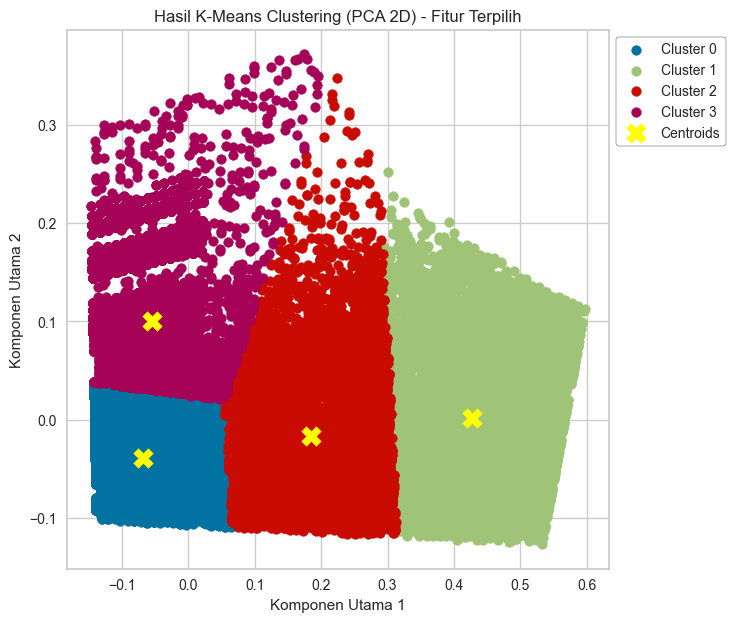

In [292]:
# Visualisasi hasil clustering dengan fitur terpilih
plt.figure(figsize=(7, 7))
for i in range(optimal_k_selected):
    plt.scatter(X_pca_selected[kmeans_selected.labels_ == i, 0],
                X_pca_selected[kmeans_selected.labels_ == i, 1],
                label=f'Cluster {i}')
plt.scatter(kmeans_selected.cluster_centers_[:, 0],
            kmeans_selected.cluster_centers_[:, 1],
            c='yellow', marker='X', s=200, label='Centroids')
plt.title('Hasil K-Means Clustering (PCA 2D) - Fitur Terpilih')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.show()

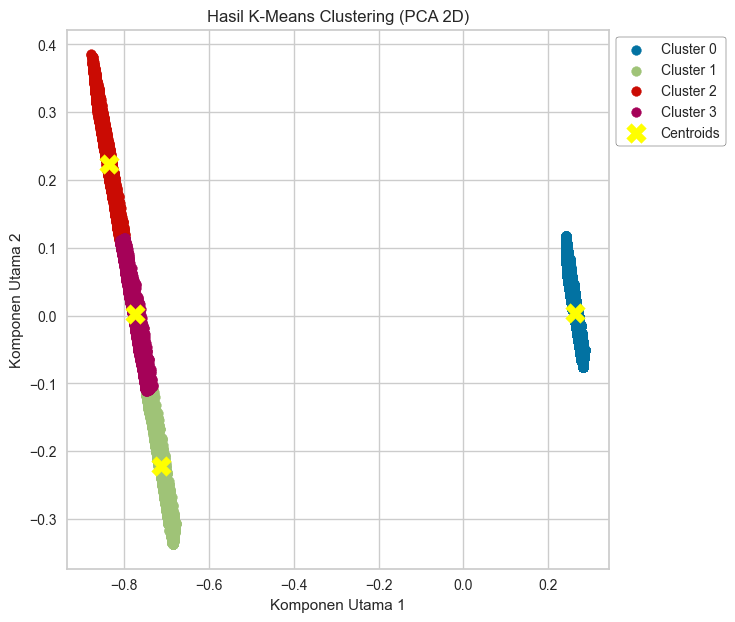

In [293]:
# Visualisasi Hasil Clustering (Model Awal) ---
plt.figure(figsize=(7, 7))
for i in range(optimal_k):
    plt.scatter(X_pca[kmeans.labels_ == i, 0],
                X_pca[kmeans.labels_ == i, 1],
                label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='yellow', marker='X', s=200, label='Centroids')
plt.title('Hasil K-Means Clustering (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [336]:
# Menggunakan model clustering awal karena silhoutte score lebih tinggi
df_original = df_clean.copy()
df_original['Cluster'] = kmeans.labels_
df_original.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.325266,0.060606,0.00,-0.239013,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.347942,0.454545,0.10,-0.196837,Sachsen-Anhalt,2023-04-15,3
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.212572,0.292929,0.05,-0.107203,Schleswig-Holstein,2021-09-07,3
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.334199,0.020202,0.00,-0.247692,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,-0.299841,0.030303,0.00,-0.242141,Bremen,2023-11-01,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [337]:
# Inverse transform untuk fitur yang di-scaling
df_original[['Quantity']] = normalizer.inverse_transform(df_original[['Quantity']])

standardizer.fit(df[['Unit_Price', 'Total_Price']])
df_original[['Unit_Price', 'Total_Price']] = standardizer.inverse_transform(df_original[['Unit_Price', 'Total_Price']])
df_original.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,3
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,3
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [338]:
# Hitung ringkasan statistik per cluster untuk fitur-fitur terpilih
selected_features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
cluster_summary = df_original.groupby('Cluster')[selected_features].mean()
print("Rata-rata nilai fitur per cluster:")
print(cluster_summary)

Rata-rata nilai fitur per cluster:
         Unit_Price   Quantity  Discount  Total_Price
Cluster                                              
0          1.844884   7.988188  0.000000    14.748905
1          1.529236  11.749524  0.059735    16.081593
2          1.626119  55.751746  0.078736    82.015655
3          1.611181  33.771930  0.066515    49.024195


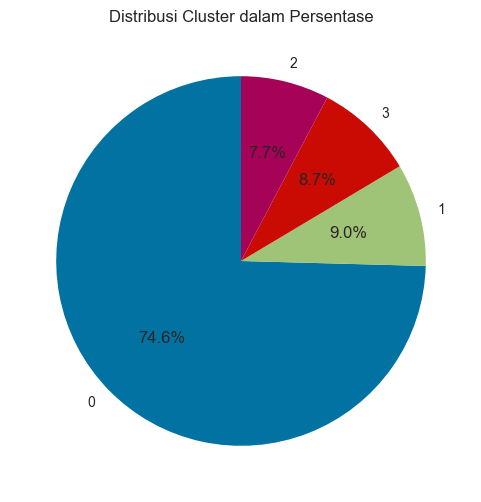

In [339]:
# Visualisasi Distribusi Cluster dengan Pie Chart
cluster_counts = df_original['Cluster'].value_counts(normalize=True)
plt.figure(figsize=(6, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Cluster dalam Persentase')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_5192\2318741625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_original, x='Cluster', y=col, palette='viridis')
C:\Users\asus\AppData\Local\Temp\ipykernel_5192\2318741625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_original, x='Cluster', y=col, palette='viridis')
C:\Users\asus\AppData\Local\Temp\ipykernel_5192\2318741625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_original, x='Cluster', y=col, palette='viridis')
C:\Users\asus\AppData\Local\Temp\i

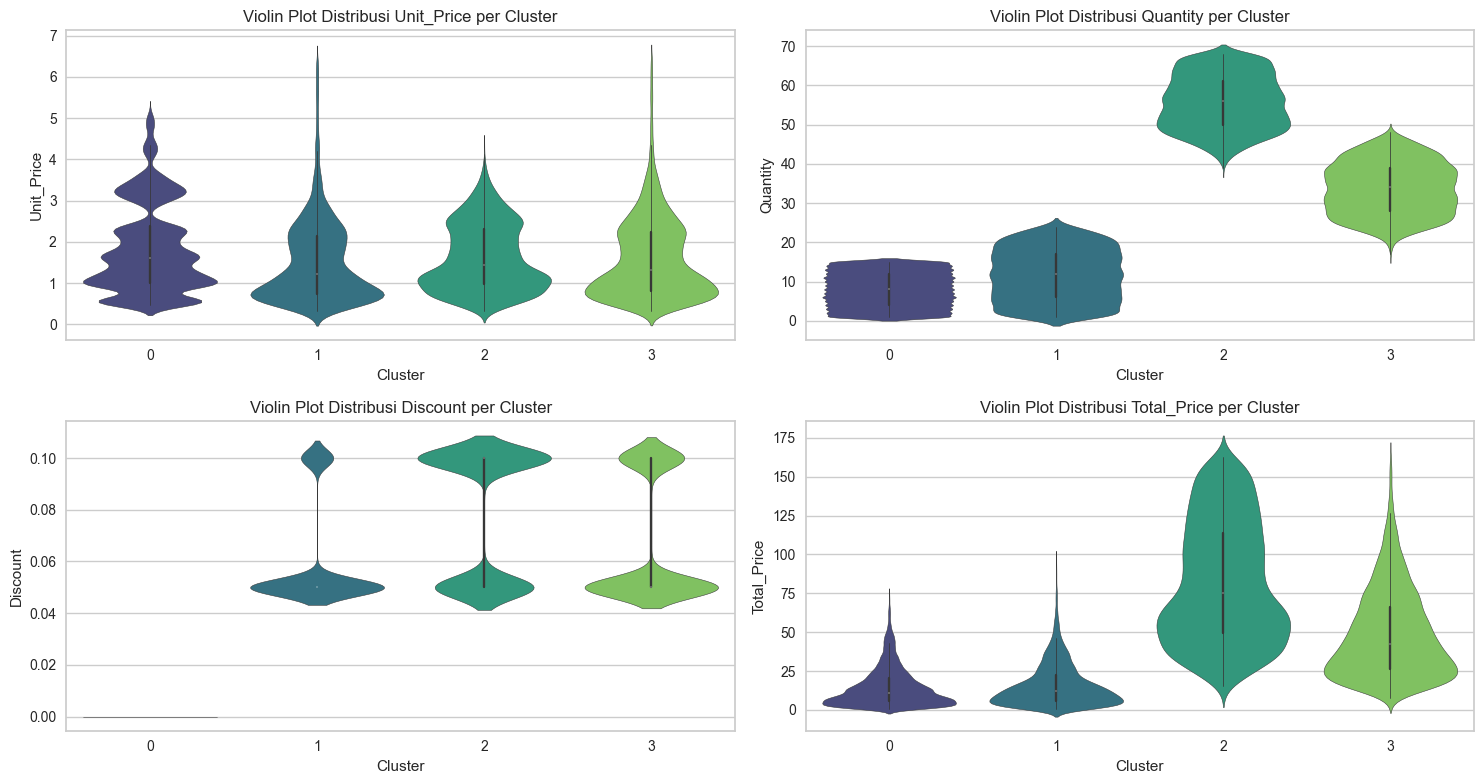

In [340]:
# Visualisasi Violin Plot untuk distribusi yang lebih detail
plt.figure(figsize=(15, 8))
for i, col in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(data=df_original, x='Cluster', y=col, palette='viridis')
    plt.title(f'Violin Plot Distribusi {col} per Cluster')
plt.tight_layout()
plt.show()

Customer_Type   B2B    B2C
Cluster                   
0                 0  56636
1              6831      0
2              5869      0
3              6612      0 



<Figure size 1000x600 with 0 Axes>

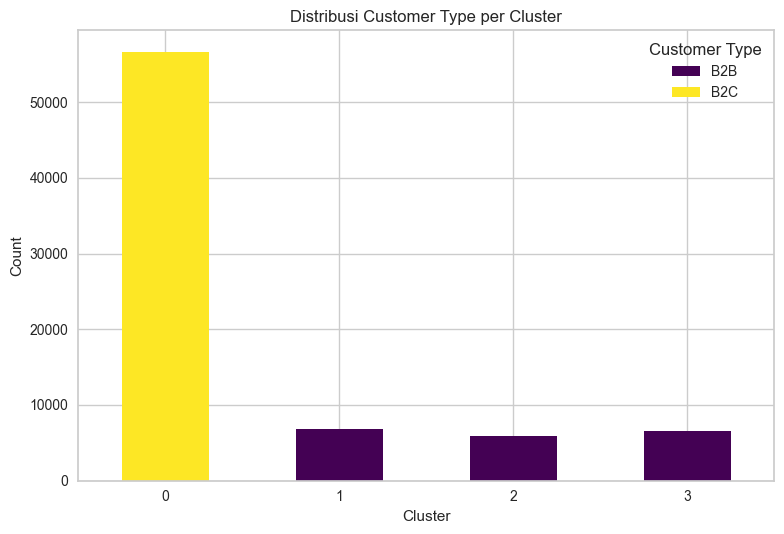

In [341]:
# Visualisasi Customer Type per Cluster
customer_type_and_cluster_counts = df_original.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)
print(customer_type_and_cluster_counts,'\n')

plt.figure(figsize=(10, 6))
customer_type_and_cluster_counts.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Distribusi Customer Type per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

In [342]:
# Rata setiap cluster
cluster_summary = df_original.groupby('Cluster')[selected_features].mean()
print(cluster_summary)

         Unit_Price   Quantity  Discount  Total_Price
Cluster                                              
0          1.844884   7.988188  0.000000    14.748905
1          1.529236  11.749524  0.059735    16.081593
2          1.626119  55.751746  0.078736    82.015655
3          1.611181  33.771930  0.066515    49.024195


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

---

### **Cluster 0**
- **Customer Type**: Didominasi B2C (39879) dengan sedikit B2B (4477).  
- **Unit_Price**: 1.245250 (paling **rendah** di antara cluster).  
- **Quantity**: 790.977861 (relatif **rendah** dibanding cluster lain).  
- **Discount**: 0.005968 (sangat **kecil**, hampir nol).  
- **Total_Price**: 9.597468 (paling **rendah**).  

**Interpretasi**:  
Cluster 0 kemungkinan berisi pembeli ritel (B2C) dengan frekuensi pembelian cenderung lebih kecil dan jarang mendapatkan diskon. Pembelian produk dengan harga satuan relatif rendah menghasilkan total harga yang juga rendah. Dapat diasumsikan bahwa ini adalah **segmen pasar massal** dengan transaksi kecil dan sering.

### **Cluster 1**
- **Customer Type**: **100% B2B** (6397).  
- **Unit_Price**: 1.617096.  
- **Quantity**: 5425.912146 (paling **tinggi** di antara semua cluster).  
- **Discount**: 0.078521 (paling **tinggi**).  
- **Total_Price**: 80.223536 (paling **tinggi**).  

**Interpretasi**:  
Cluster 1 terdiri dari pelanggan korporat (B2B) yang membeli dalam **jumlah sangat besar**, sehingga mendapatkan **diskon tertinggi**. Alhasil, **Total_Price** per transaksi pun menjadi sangat tinggi. Ini kemungkinan **pelanggan utama** atau **grosir** yang menyuplai dalam volume besar.

### **Cluster 2**
- **Customer Type**: **100% B2B** (6876).  
- **Unit_Price**: 1.498893.  
- **Quantity**: 3126.655759 (masih tinggi, tapi di bawah cluster 1).  
- **Discount**: 0.065292 (di bawah cluster 1, di atas cluster 0 dan 3).  
- **Total_Price**: 43.755564 (menengah, lebih rendah dari cluster 1).  

**Interpretasi**:  
Cluster 2 juga berisi pelanggan B2B dengan pembelian dalam jumlah besar, namun **tidak sebesar** cluster 1. Mereka tetap memperoleh diskon lumayan tinggi, dan total harga menengah. Cluster ini bisa dikatakan **segmen bisnis** skala menengah.

### **Cluster 3**
- **Customer Type**: Campuran B2C (16757) dan B2B (1562), dengan **dominan B2C**.  
- **Unit_Price**: 3.234054 (paling **tinggi** di antara semua cluster).  
- **Quantity**: 874.414651 (sedang, lebih tinggi dari cluster 0 tapi jauh di bawah cluster 1 & 2).  
- **Discount**: 0.005131 (sangat **rendah**, hampir nol).  
- **Total_Price**: 27.889717 (cukup tinggi, tapi di bawah cluster 1 & 2).  

**Interpretasi**:  
Cluster 3 memiliki **harga satuan produk yang mahal**. Meskipun pembeliannya tidak sebanyak cluster 1 dan 2, total harga masih tergolong tinggi. Diskon yang hampir nol menandakan pelanggan di segmen ini **kurang sensitif terhadap harga**. Kemungkinan, ini adalah **produk premium** atau **khusus**, yang tetap dibeli meskipun harganya relatif mahal.

---

## 3. Kesimpulan Umum

- **Cluster 0**: Pasar ritel massal (B2C) dengan **pembelian kecil** dan **diskon minim**.  
- **Cluster 1**: **B2B volume sangat besar**, diskon tertinggi, dan total harga tertinggi.  
- **Cluster 2**: **B2B volume menengah**, diskon sedang, total harga menengah.  
- **Cluster 3**: Campuran B2B dan B2C, **Unit_Price tinggi**, sedikit diskon, total harga moderat-tinggi.  

Dari sini, perusahaan dapat menyesuaikan **strategi pemasaran** dan **penetapan harga**. Misalnya, meninjau kembali program diskon untuk klien B2B di Cluster 1 & 2, atau mengembangkan produk premium lebih lanjut untuk pelanggan di Cluster 3. Di sisi lain, pendekatan massal dan penawaran bundling dapat menyasar pelanggan di Cluster 0.

---

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [343]:
df_original.to_csv('Dataset_clustering.csv', index=False)